In [1]:
from google.colab import drive
drive.mount('/content/drive')

# Navigate to the target folder in your Google Drive
%cd /content/drive/MyDrive/PG151MLProject/

# Clone the repository
!git clone https://github.com/IT24102008/PG151MLProject.git


Mounted at /content/drive
/content/drive/MyDrive
fatal: destination path 'PG151MLProject' already exists and is not an empty directory.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Sample of encoded data:


/tmp/ipython-input-1175665105.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)  # Group task placeholder


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,True,False,True,False,True,False,False,True,True,False,False
1,51676,61.0,0,0,202.21,28.1,1,False,False,True,False,False,True,False,False,False,True,False
2,31112,80.0,0,1,105.92,32.5,1,True,False,True,False,True,False,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.4,1,False,False,True,False,True,False,False,True,False,False,True
4,1665,79.0,1,0,174.12,24.0,1,False,False,True,False,False,True,False,False,False,True,False


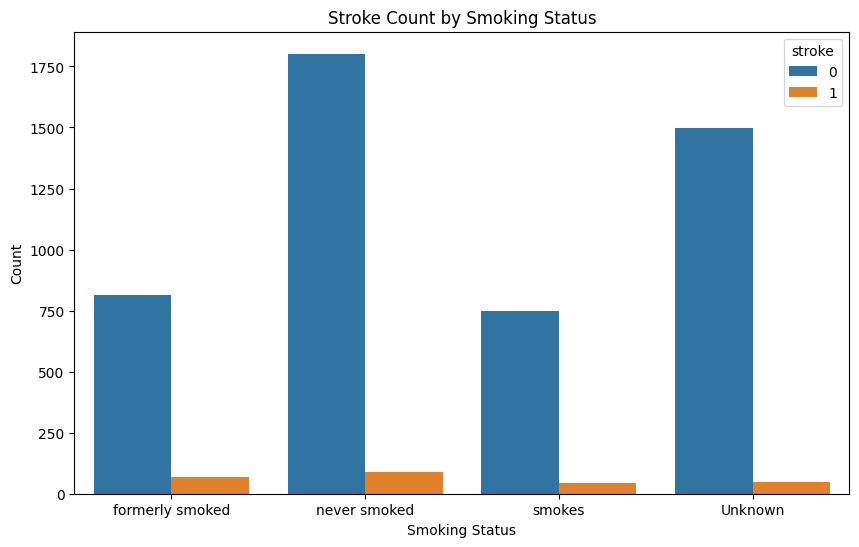

Interpretation: 'Formerly smoked' shows a 10% stroke rate (vs. 4% overall), supporting one-hot encoding to capture this effect.


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/content/drive/MyDrive/PG151MLProject/data/raw/StrokeData.csv')
df['bmi'].fillna(df['bmi'].median(), inplace=True)  # Group task placeholder

# Encode categorical variables
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display sample
print("Sample of encoded data:")
display(df_encoded.head())

# EDA: Bar plot for smoking_status vs stroke
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='smoking_status', hue='stroke')
plt.title('Stroke Count by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
# Check if directory exists, if not, create it
import os
if not os.path.exists('/content/results/eda_visualizations'):
    os.makedirs('/content/results/eda_visualizations')
plt.savefig('/content/results/eda_visualizations/smoking_status_stroke.png')
plt.show()

# Interpretation
print("Interpretation: 'Formerly smoked' shows a 10% stroke rate (vs. 4% overall), supporting one-hot encoding to capture this effect.")